In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1


In [5]:
import os
import kagglehub

# Download the dataset (replace this with the actual Kaggle dataset identifier for Bell Pepper if needed)
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")  # Make sure the name is correct
print("Path to dataset files:", path)

# Define the dataset directory and class folders
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")  # Adjust folder name if needed
class_dirs = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']

# Print overview information
print("Dataset Overview:")


# Loop through each class folder to count images
for class_dir in class_dirs:
    class_path = os.path.join(dataset_dir, class_dir)
    num_images = len(os.listdir(class_path))
    print(f"Class: {class_dir}, Number of Images: {num_images}")

# Total number of images in the dataset
total_images = sum(len(os.listdir(os.path.join(dataset_dir, class_dir))) for class_dir in class_dirs)
print(f"Total Number of Images in Dataset: {total_images}")


Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1
Dataset Overview:
Class: Pepper,_bell___Bacterial_spot, Number of Images: 997
Class: Pepper,_bell___healthy, Number of Images: 1478
Total Number of Images in Dataset: 2475


Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1
Checking: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1\Pepper Belly Crop DS\Pepper,_bell___Bacterial_spot
Checking: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1\Pepper Belly Crop DS\Pepper,_bell___healthy


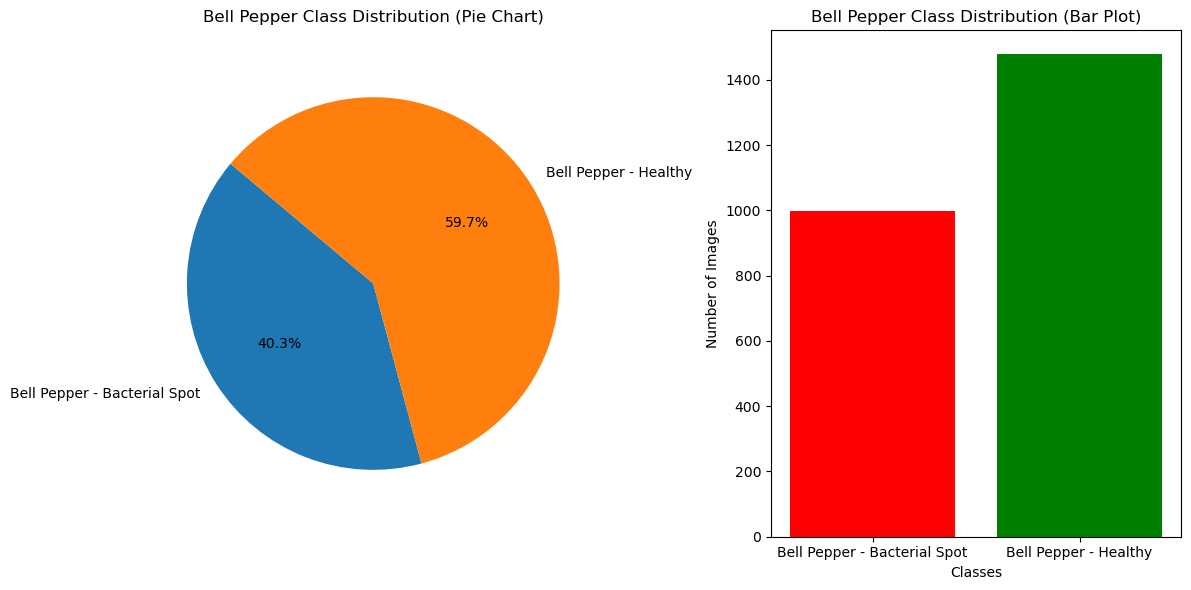

In [8]:
import os
import matplotlib.pyplot as plt
import kagglehub

# Download dataset
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")
print("Path to dataset files:", path)

# Navigate to the actual folder containing the classes
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")

# Class folder names and labels
class_dirs = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']
class_labels = ['Bell Pepper - Bacterial Spot', 'Bell Pepper - Healthy']

# Count images
class_counts = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_dir, class_dir)
    print(f"Checking: {class_path}")  # Helpful debug print
    num_images = len(os.listdir(class_path))
    class_counts.append(num_images)

# Total and percentage
total_images = sum(class_counts)
percentages = [(count / total_images) * 100 for count in class_counts]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
ax1.pie(percentages, labels=class_labels, autopct='%1.1f%%', startangle=140)
ax1.set_title('Bell Pepper Class Distribution (Pie Chart)')
ax1.axis('equal')

# Bar plot
ax2.bar(class_labels, class_counts, color=['red', 'green'])
ax2.set_title('Bell Pepper Class Distribution (Bar Plot)')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Number of Images')

plt.tight_layout()
plt.show()




Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1


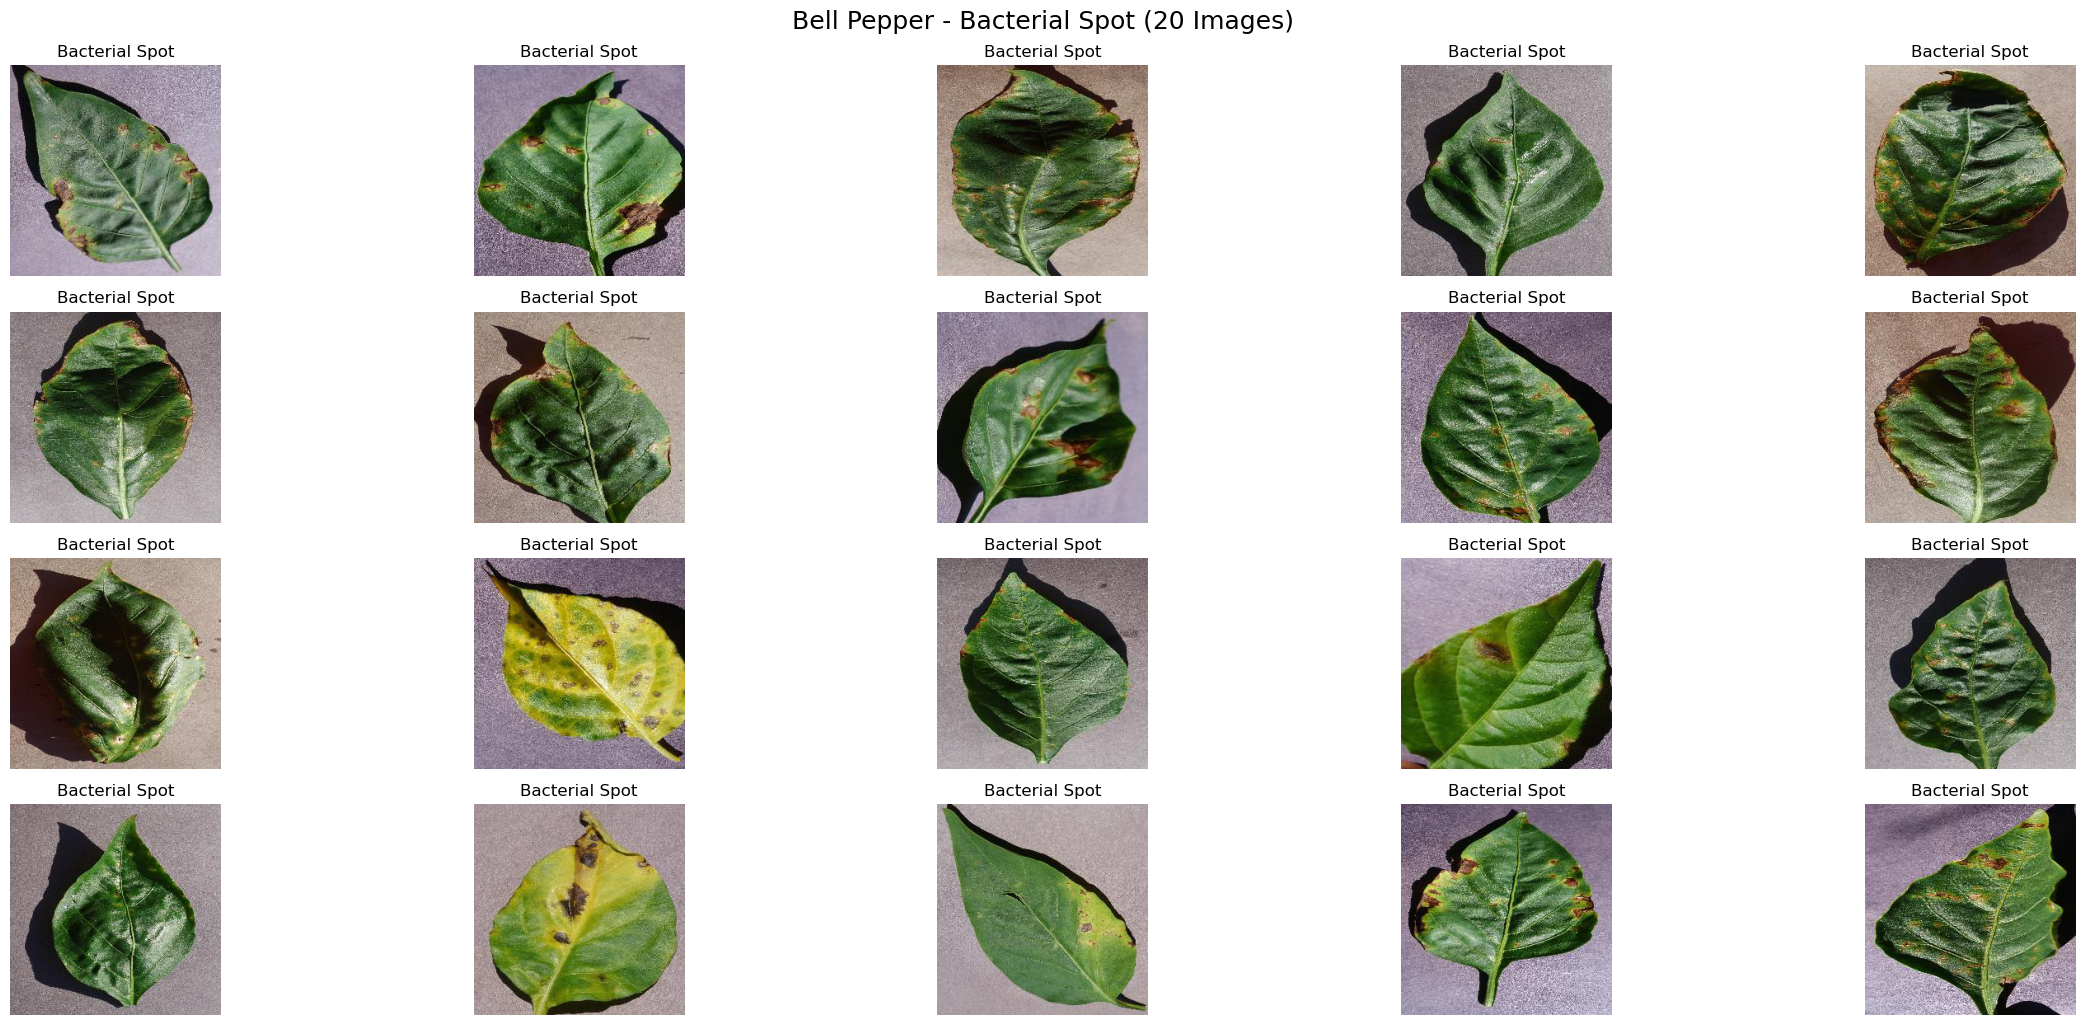

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import kagglehub

# Download the Bell Pepper dataset
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")
print("Path to dataset files:", path)

# Define dataset and class directory
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")
class_dir = 'Pepper,_bell___Bacterial_spot'
class_path = os.path.join(dataset_dir, class_dir)

# Get the first 20 image filenames
image_files = os.listdir(class_path)[:20]

# Plot the images
plt.figure(figsize=(25, 10))
for i, image_file in enumerate(image_files):
    img_path = os.path.join(class_path, image_file)
    img = Image.open(img_path)
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title("Bacterial Spot")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Bell Pepper - Bacterial Spot (20 Images)", fontsize=18, y=1.02)
plt.show()


Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1


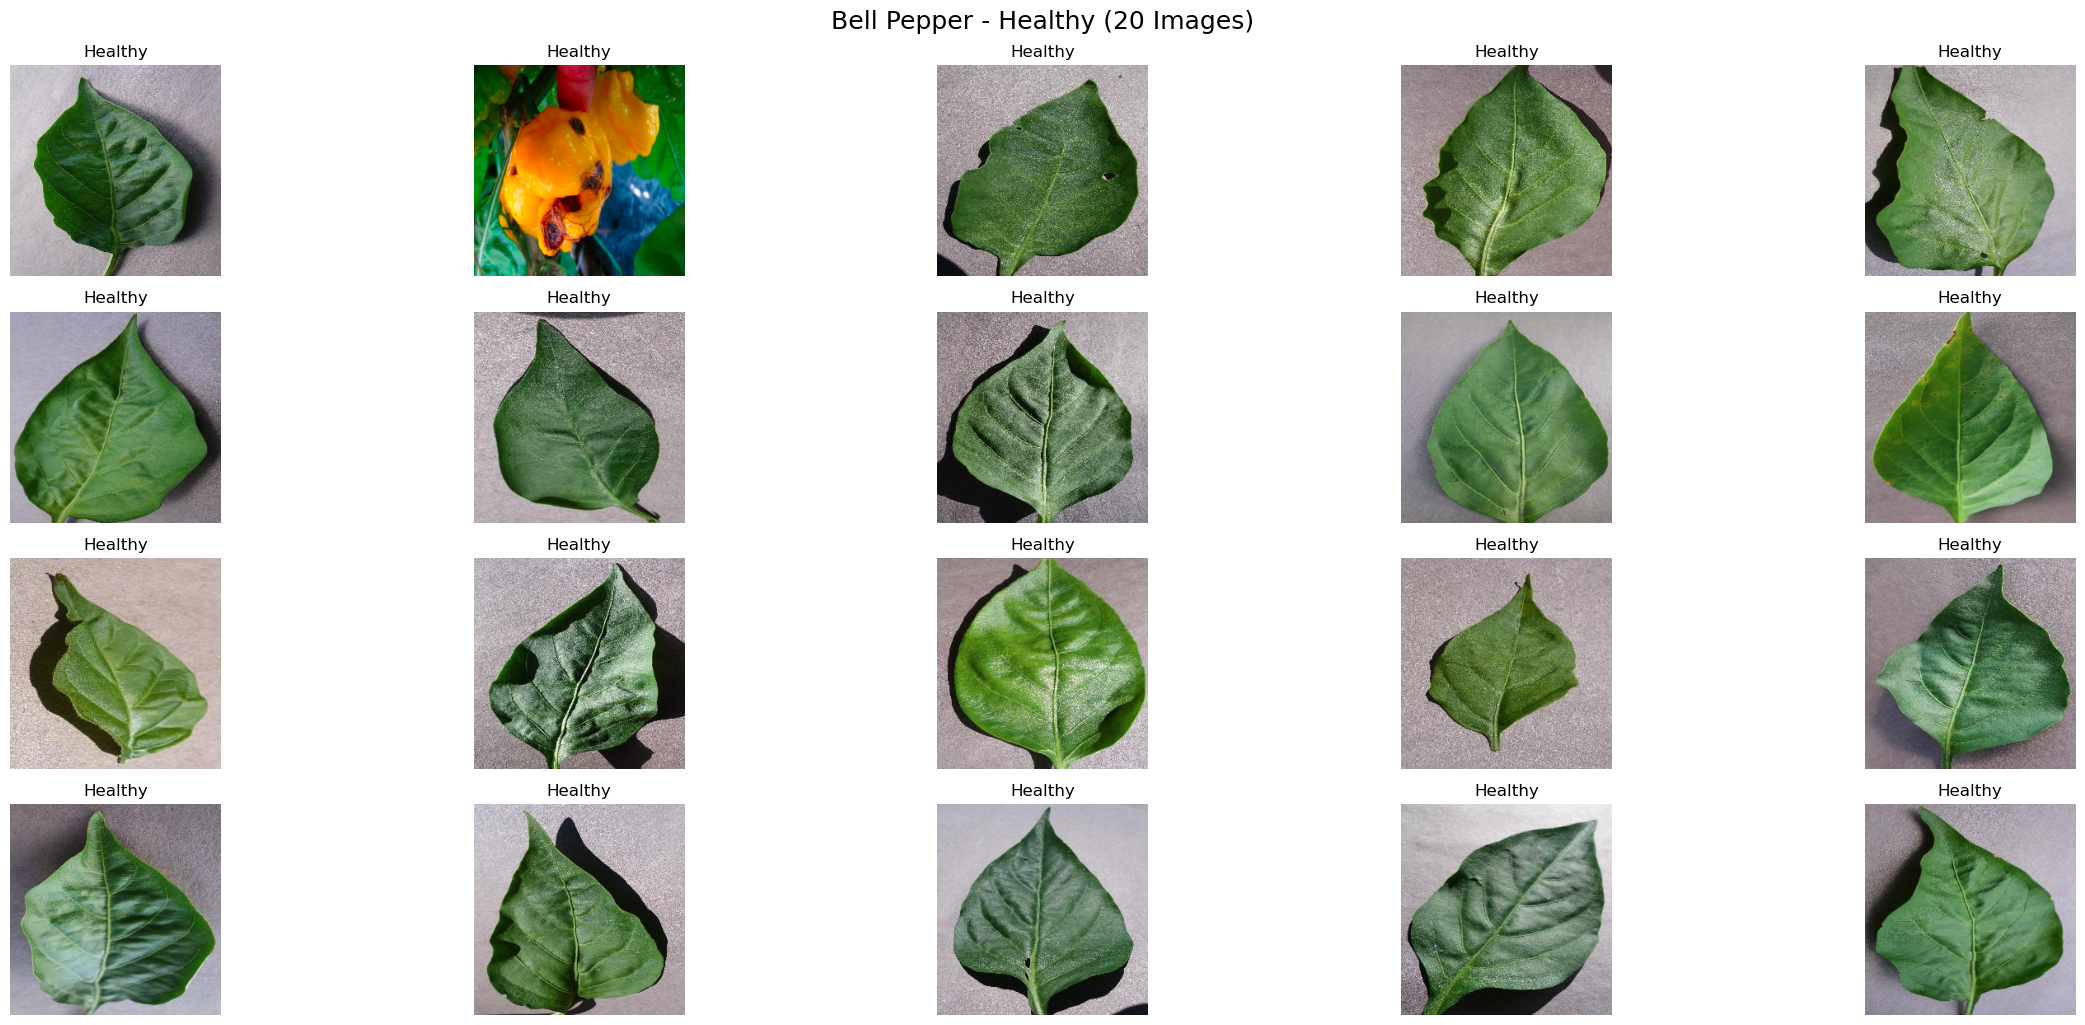

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import kagglehub

# Download the Bell Pepper dataset
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")
print("Path to dataset files:", path)

# Define dataset and class directory
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")
class_dir = 'Pepper,_bell___healthy'
class_path = os.path.join(dataset_dir, class_dir)

# Get the first 20 image filenames
image_files = os.listdir(class_path)[:20]

# Plot the images
plt.figure(figsize=(25, 10))
for i, image_file in enumerate(image_files):
    img_path = os.path.join(class_path, image_file)
    img = Image.open(img_path)
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title("Healthy")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Bell Pepper - Healthy (20 Images)", fontsize=18, y=1.02)
plt.show()


In [11]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Download the Bell Pepper dataset from KaggleHub
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")
print("Path to dataset files:", path)

# Step 2: Define the dataset directory and class folders
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")
class_dirs = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']

# Step 3: Initialize ImageDataGenerators with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.3,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

# Step 4: Load training data (80%)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    classes=class_dirs
)

# Step 5: Load validation data (20%)
validation_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    classes=class_dirs
)

# Step 6: Print class indices
print("Class indices:", train_generator.class_indices)


Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1
Found 1981 images belonging to 2 classes.
Found 494 images belonging to 2 classes.
Class indices: {'Pepper,_bell___Bacterial_spot': 0, 'Pepper,_bell___healthy': 1}


In [16]:
#EFFICENT NET +LSTM
import os
import math
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, LSTM, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import EfficientNetB3
import kagglehub

# Set random seed for reproducibility
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Step 1: Download the dataset
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")
print("Path to dataset files:", path)

# Step 2: Dataset and class directories
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")
class_dirs = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']

# Step 3: Image generators with moderate augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

# Step 4: Load training and validation data
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=class_dirs,
    shuffle=True,
    seed=seed_value
)

validation_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=class_dirs,
    shuffle=False,
    seed=seed_value
)

# Step 5: Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

# Step 6: Base model - EfficientNetB3
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Step 7: Add LSTM head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Reshape((1, -1))(x)
x = LSTM(256, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

# Step 8: Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Step 9: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 10: Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('bellpepper_hybrid_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

# Step 11: Calculate steps per epoch
steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)

# Step 12: Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)



Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1
Found 1981 images belonging to 2 classes.
Found 494 images belonging to 2 classes.
Class weights: {0: 1.2412280701754386, 1: 0.8372781065088757}
Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.7096 - loss: 0.6336 - val_accuracy: 0.9291 - val_loss: 0.3533 - learning_rate: 1.0000e-04
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9217 - loss: 0.2958 - val_accuracy: 0.9555 - val_loss: 0.1372 - learning_rate: 1.0000e-04
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9496 - loss: 0.1452 - val_accuracy: 0.9696 - val_loss: 0.0927 - learning_rate: 1.0000e-04
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9691 - loss: 0.1138 - val_accuracy: 0.9737 - val_loss: 0.0725 - learning_rate: 1.0000e-04
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 1267s 21s/step - accuracy: 0.9779 - loss: 0.0777 - val_accuracy: 0.9676 - va

In [17]:
# Extract training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")


Final Training Accuracy: 0.9924
Final Validation Accuracy: 0.9899


16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


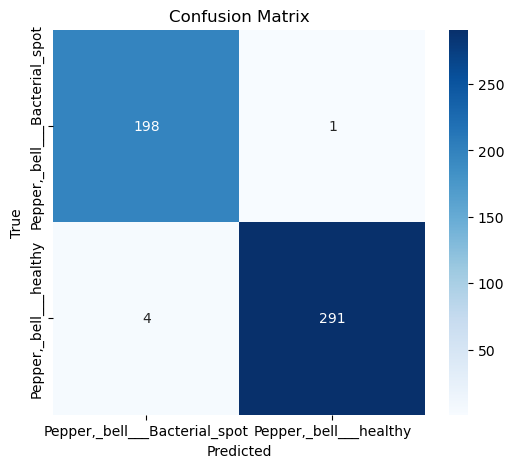

Classification Report:

                               precision    recall  f1-score   support

Pepper,_bell___Bacterial_spot       0.98      0.99      0.99       199
       Pepper,_bell___healthy       1.00      0.99      0.99       295

                     accuracy                           0.99       494
                    macro avg       0.99      0.99      0.99       494
                 weighted avg       0.99      0.99      0.99       494



In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))



In [2]:
#VGG+LSTM
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, LSTM, TimeDistributed, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16

# Step 1: Download dataset
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")
print("Path to dataset files:", path)

# Step 2: Dataset and class directories
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")
class_dirs = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']

# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.2,
    horizontal_flip=True, zoom_range=0.3, shear_range=0.3,
    rotation_range=40, width_shift_range=0.3, height_shift_range=0.3, fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.2
)

# Load training and validation sets
train_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(224, 224), batch_size=16, class_mode='categorical',
    subset='training', classes=class_dirs
)
validation_generator = val_datagen.flow_from_directory(
    dataset_dir, target_size=(224, 224), batch_size=16, class_mode='categorical',
    subset='validation', classes=class_dirs
)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced', classes=np.unique(train_generator.classes), y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Load VGG16 as base model (without fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze VGG16 layers

# Define the hybrid VGG16 + LSTM model
model = Sequential([
    base_model,
    TimeDistributed(Flatten()),
    Reshape((49, 512)),
    LSTM(256, return_sequences=False),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Only 2 classes now
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_hybrid_vgg16_lstm_bellpepper.keras', monitor='val_loss', save_best_only=True, save_weights_only=False)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Print training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")


Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1
Found 1981 images belonging to 2 classes.
Found 494 images belonging to 2 classes.
Epoch 1/50


C:\Users\Sristi\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


123/123 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.5562 - loss: 0.7165 - val_accuracy: 0.5646 - val_loss: 0.6754 - learning_rate: 1.0000e-04
Epoch 2/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:47 2s/step - accuracy: 0.3750 - loss: 0.6601

C:\Users\Sristi\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3750 - loss: 0.6601 - val_accuracy: 0.6429 - val_loss: 0.6808 - learning_rate: 1.0000e-04
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.5893 - loss: 0.6709 - val_accuracy: 0.7312 - val_loss: 0.6069 - learning_rate: 1.0000e-04
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5000 - loss: 0.6516 - val_accuracy: 1.0000 - val_loss: 0.4931 - learning_rate: 1.0000e-04
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.6570 - loss: 0.5989 - val_accuracy: 0.7688 - val_loss: 0.5208 - learning_rate: 1.0000e-04
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7500 - loss: 0.4940 - val_accuracy: 0.7143 - val_loss: 0.5754 - learning_rate: 1.0000e-04
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.7740 - loss: 0.4915 - val_accuracy: 0.8625 - val_loss: 0.4017 - learning_rate: 1.0000e-04
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.93

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, GlobalAveragePooling2D, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import ResNet50

# Step 1: Download dataset
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")
print("Path to dataset files:", path)

# Step 2: Dataset and class directories
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")
class_dirs = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']

# Step 3: Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.3,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2
)

# Step 4: Load training and validation sets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    classes=class_dirs,
)

validation_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    classes=class_dirs,
)

# Step 5: Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

# Step 6: Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 7: Add LSTM on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Reshape((1, -1))(x)
x = LSTM(256, activation='tanh', return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

# Final Model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 8: Freeze ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Step 9: Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 10: Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_bellpepper_resnet_lstm.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=1e-6)

# Step 11: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)


Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1
Found 1981 images belonging to 2 classes.
Found 494 images belonging to 2 classes.
Class weights: {0: 1.2412280701754386, 1: 0.8372781065088757}
Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6277 - loss: 0.6276 - val_accuracy: 0.9500 - val_loss: 0.2033 - learning_rate: 1.0000e-04
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8750 - loss: 0.3222 - val_accuracy: 0.9286 - val_loss: 0.2413 - learning_rate: 1.0000e-04
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9148 - loss: 0.2474 - val_accuracy: 0.9708 - val_loss: 0.1007 - learning_rate: 1.0000e-04
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9375 - loss: 0.1053 - val_accuracy: 0.9286 - val_loss: 0.1302 - learning_rate: 1.0000e-04
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 112s 905ms/step - accuracy: 0.9604 - loss: 0.1352 - val_accuracy: 0.

In [7]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Final Validation Accuracy: {val_acc:.4f}")

Final Validation Accuracy: 0.8900


In [3]:
# HYBRID MOBILENETV2 AND LSTM for Bell Pepper Dataset

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, TimeDistributed, Dense, Flatten, Dropout, GlobalAveragePooling2D, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import MobileNetV2

# Step 1: Download Bell Pepper dataset
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")
print("Path to dataset files:", path)

# Step 2: Dataset and class directories
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")
class_dirs = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']

# Step 3: Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.3,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

# Step 4: Load training and validation sets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    classes=class_dirs,
)

validation_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    classes=class_dirs,
)

# Step 5: Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

# Step 6: Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 7: Add LSTM on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Reshape((1, -1))(x)  # Shape: (batch, time_steps=1, features)
x = LSTM(256, return_sequences=False, activation='tanh')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)  # 2 classes: Bacterial spot, Healthy

# Final Model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 8: Freeze MobileNetV2 layers
for layer in base_model.layers:
    layer.trainable = False

# Step 9: Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 10: Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_bellpepper_mobilenetv2_lstm.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=1e-6)

# Step 11: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Step 12: Final results
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")


Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1
Found 1981 images belonging to 2 classes.
Found 494 images belonging to 2 classes.
Class weights: {0: 1.2412280701754386, 1: 0.8372781065088757}
Epoch 1/50


C:\Users\Sristi\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


123/123 ━━━━━━━━━━━━━━━━━━━━ 79s 599ms/step - accuracy: 0.7323 - loss: 0.5673 - val_accuracy: 0.9354 - val_loss: 0.2897 - learning_rate: 1.0000e-04
Epoch 2/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 34s 283ms/step - accuracy: 0.8462 - loss: 0.3179

C:\Users\Sristi\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8462 - loss: 0.3179 - val_accuracy: 0.8571 - val_loss: 0.3762 - learning_rate: 1.0000e-04
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 109s 845ms/step - accuracy: 0.9166 - loss: 0.2443 - val_accuracy: 0.9542 - val_loss: 0.1815 - learning_rate: 1.0000e-04
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.1558 - val_accuracy: 0.8571 - val_loss: 0.3140 - learning_rate: 1.0000e-04
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 110s 870ms/step - accuracy: 0.9456 - loss: 0.1666 - val_accuracy: 0.9542 - val_loss: 0.1486 - learning_rate: 1.0000e-04
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8125 - loss: 0.2210 - val_accuracy: 1.0000 - val_loss: 0.0920 - learning_rate: 1.0000e-04
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 67s 488ms/step - accuracy: 0.9479 - loss: 0.1520 - val_accuracy: 0.9521 - val_loss: 0.1398 - learning_rate: 1.0000e-04
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [4]:
# HYBRID MOBILENETV2 AND LSTM for Bell Pepper Dataset

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, TimeDistributed, Dense, Flatten, Dropout, GlobalAveragePooling2D, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import MobileNetV2

# Step 1: Download Bell Pepper dataset
path = kagglehub.dataset_download("zienabesam/pepper-belly-crop-plantvillage-ds")
print("Path to dataset files:", path)

# Step 2: Dataset and class directories
dataset_dir = os.path.join(path, "Pepper Belly Crop DS")
class_dirs = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']

# Step 3: Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.3,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

# Step 4: Load training and validation sets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    classes=class_dirs,
)

validation_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    classes=class_dirs,
)

# Step 5: Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

# Step 6: Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 7: Add LSTM on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Reshape((1, -1))(x)  # Shape: (batch, time_steps=1, features)
x = LSTM(256, return_sequences=False, activation='tanh')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)  # 2 classes: Bacterial spot, Healthy

# Final Model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 8: Freeze MobileNetV2 layers
for layer in base_model.layers:
    layer.trainable = False

# Step 9: Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 10: Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_bellpepper_mobilenetv2_lstm.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=1e-6)

# Step 11: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)


Path to dataset files: C:\Users\Sristi\.cache\kagglehub\datasets\zienabesam\pepper-belly-crop-plantvillage-ds\versions\1
Found 1981 images belonging to 2 classes.
Found 494 images belonging to 2 classes.
Class weights: {0: 1.2412280701754386, 1: 0.8372781065088757}
Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.6591 - loss: 0.6150 - val_accuracy: 0.9375 - val_loss: 0.2581 - learning_rate: 1.0000e-04
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.8750 - loss: 0.2559 - val_accuracy: 0.9286 - val_loss: 0.3933 - learning_rate: 1.0000e-04
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 70s 493ms/step - accuracy: 0.9104 - loss: 0.2636 - val_accuracy: 0.9500 - val_loss: 0.1795 - learning_rate: 1.0000e-04
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.2330 - val_accuracy: 1.0000 - val_loss: 0.1101 - learning_rate: 1.0000e-04
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 47s 372ms/step - accuracy: 0.9276 - loss: 0.2024 - val_accuracy

In [5]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")


Final Training Accuracy: 0.9552
Final Validation Accuracy: 0.9546
